In [61]:
import time
import os
import struct
import numpy as np

def load_mnist_train(path):
    labels_path = os.path.join(path,'train-labels.idx1-ubyte')
    images_path = os.path.join(path, 'train-images.idx3-ubyte')
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels
def load_mnist_test(path):
    labels_path = os.path.join(path,'t10k-labels.idx1-ubyte')
    images_path = os.path.join(path, 't10k-images.idx3-ubyte')
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
    return images, labels
X_train,Y_train = load_mnist_train('E:\学习\大三\机器学习\MNIST')
X_test,Y_test = load_mnist_test('E:\学习\大三\机器学习\MNIST')

### svm

In [50]:
import sys
path = 'D:\LIBSVM\libsvm-3.22\python'
sys.path.append(path)
from svmutil import *
from svm  import *

y_train_svm = Y_train.tolist()
x_train_svm=[]
index = range(1,785)
for i in X_train:
    x_train_svm.append(dict(zip(index, i)))
    
y_test_svm = Y_test.tolist()
x_test_svm=[]
index = range(1,785)
for i in X_test:
    x_test_svm.append(dict(zip(index, i)))

In [39]:
def test_svm(nums,typet):
    start =time.clock()
    prob  = svm_problem(y_train_svm[:nums], x_train_svm[:nums])
    param = svm_parameter('-t %d -c 4 -m 1024'%typet)
    model = svm_train(prob, param)
    end1 = time.clock()
    print('training time: %s Seconds'%(end1-start))
    p_label, p_acc, p_val = svm_predict(y_test_svm[:1000], x_test_svm[:1000], model)
    end = time.clock()
    print('Running time: %s Seconds'%(end-start))
    return p_acc[0],end1-start,end-start

In [40]:
def check_time(types):
    ac=[]
    train_time=[]
    total_time=[]
    for i in range(100):
        a,b,c = test_svm((i+1)*100,types)
        ac.append(a)
        train_time.append(b)
        total_time.append(c)
    return ac,train_time,total_time

In [32]:
# 线性核
ac,train_time,total_time = check_time(0)

training time: 0.299554410404653 Seconds
Accuracy = 62.2% (622/1000) (classification)
Running time: 1.5506304585123871 Seconds
training time: 0.5315588761773142 Seconds
Accuracy = 73.7% (737/1000) (classification)
Running time: 1.8328507660039577 Seconds
training time: 0.6470510849762832 Seconds
Accuracy = 80.6% (806/1000) (classification)
Running time: 1.9988618285092343 Seconds
training time: 0.8055642798253757 Seconds
Accuracy = 83% (830/1000) (classification)
Running time: 2.1993641093959013 Seconds
training time: 1.0296074710822722 Seconds
Accuracy = 84.1% (841/1000) (classification)
Running time: 2.485522782590124 Seconds
training time: 1.120800251891069 Seconds
Accuracy = 86% (860/1000) (classification)
Running time: 2.6343115445197327 Seconds
training time: 1.3513082256099551 Seconds
Accuracy = 84.9% (849/1000) (classification)
Running time: 2.917802764085536 Seconds
training time: 1.492817588759408 Seconds
Accuracy = 84.1% (841/1000) (classification)
Running time: 3.1615152653

training time: 14.67495031117005 Seconds
Accuracy = 89.3% (893/1000) (classification)
Running time: 17.759849371042947 Seconds
training time: 14.872358867327875 Seconds
Accuracy = 89.2% (892/1000) (classification)
Running time: 17.932739635271446 Seconds
training time: 15.077221044281032 Seconds
Accuracy = 89.8% (898/1000) (classification)
Running time: 18.70339116635114 Seconds
training time: 15.710041232543972 Seconds
Accuracy = 89.5% (895/1000) (classification)
Running time: 18.878325082479023 Seconds
training time: 15.557423536880378 Seconds
Accuracy = 89.5% (895/1000) (classification)
Running time: 18.839220733762886 Seconds
training time: 16.808139289119026 Seconds
Accuracy = 88.6% (886/1000) (classification)
Running time: 20.44411601685033 Seconds
training time: 17.636122900397368 Seconds
Accuracy = 88.8% (888/1000) (classification)
Running time: 21.123846174206847 Seconds
training time: 21.731935527582664 Seconds
Accuracy = 89.6% (896/1000) (classification)
Running time: 27.319

In [41]:
# 多项式核
ac1,train_time1,total_time1 = check_time(1)

training time: 0.15668801182619063 Seconds
Accuracy = 52.1% (521/1000) (classification)
Running time: 1.446813890195699 Seconds
training time: 0.3037100598003235 Seconds
Accuracy = 64.7% (647/1000) (classification)
Running time: 1.6165369483019276 Seconds
training time: 0.4658313491381705 Seconds
Accuracy = 72% (720/1000) (classification)
Running time: 1.8355277011028193 Seconds
training time: 0.6256348140627779 Seconds
Accuracy = 75.7% (757/1000) (classification)
Running time: 2.1872645681805807 Seconds
training time: 0.7968389568327439 Seconds
Accuracy = 78.2% (782/1000) (classification)
Running time: 2.249871506325235 Seconds
training time: 0.957917284443738 Seconds
Accuracy = 82.5% (825/1000) (classification)
Running time: 2.4840788336846344 Seconds
training time: 1.1972130008339263 Seconds
Accuracy = 83.5% (835/1000) (classification)
Running time: 2.7877884984236516 Seconds
training time: 1.3139950846480133 Seconds
Accuracy = 84.5% (845/1000) (classification)
Running time: 2.98889

training time: 16.990123468495767 Seconds
Accuracy = 93.4% (934/1000) (classification)
Running time: 20.200918675454886 Seconds
training time: 16.96357140119926 Seconds
Accuracy = 93.3% (933/1000) (classification)
Running time: 19.942422586757857 Seconds
training time: 17.728946494088632 Seconds
Accuracy = 93.7% (937/1000) (classification)
Running time: 20.827568006832735 Seconds
training time: 18.11248223705752 Seconds
Accuracy = 93.7% (937/1000) (classification)
Running time: 21.28115956800866 Seconds
training time: 18.690735773942833 Seconds
Accuracy = 93.6% (936/1000) (classification)
Running time: 22.03590000683471 Seconds
training time: 18.457107211330367 Seconds
Accuracy = 93.7% (937/1000) (classification)
Running time: 21.465748781334696 Seconds
training time: 18.93964846658946 Seconds
Accuracy = 93.8% (938/1000) (classification)
Running time: 21.956455162719976 Seconds
training time: 19.35926515445135 Seconds
Accuracy = 93.7% (937/1000) (classification)
Running time: 22.439425

In [ ]:
test_svm(60000,0)

In [63]:
start =time.clock()
prob_3  = svm_problem(y_train_svm[:10000], x_train_svm[:10000])
param_3 = svm_parameter('-t 2 -c 4 -b 1')
model_3 = svm_train(prob_3, param_3)
p_label_3, p_acc_3, p_val_3 = svm_predict(y_test_svm[:1000], x_test_svm[:1000], model_3)
end = time.clock()
print('Running time: %s Seconds'%(end-start))

Model supports probability estimates, but disabled in predicton.
Accuracy = 12.6% (126/1000) (classification)
Running time: 941.7631710461183 Seconds


#### 作图

Text(0,0.5,'accuracy rate')

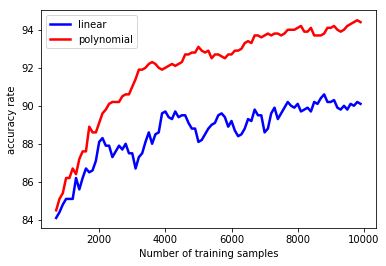

In [47]:
from pylab import *
%matplotlib inline
t = np.arange(700,10000., 100)
plot(t, ac[7:], color="blue", linewidth=2.5, linestyle="-", label="linear")
plot(t, ac1[7:], color="red",  linewidth=2.5, linestyle="-", label="polynomial")
# plot(t, accuracy3[100:], color="green",  linewidth=2.5, linestyle="-", label="4 layer")
legend(loc='upper left')
plt.xlabel('Number of training samples')
plt.ylabel('accuracy rate')

Text(0,0.5,'train time')

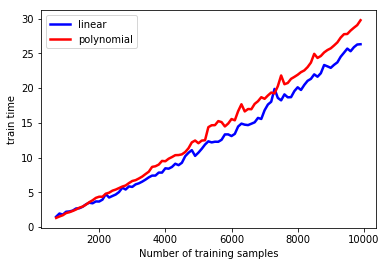

In [60]:
t = np.arange(700,10000., 100)
plot(t, train_time[7:], color="blue", linewidth=2.5, linestyle="-", label="linear")
plot(t, train_time1[7:], color="red",  linewidth=2.5, linestyle="-", label="polynomial")
# plot(t, accuracy3[100:], color="green",  linewidth=2.5, linestyle="-", label="4 layer")
legend(loc='upper left')
plt.xlabel('Number of training samples')
plt.ylabel('train time')

### NN

#### 使用tensorflow

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# 自动获取MNIST的数据集
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [55]:
inputSize  = 784
outputSize = 10
hiddenSize = 89
batchSize  = 1
trainCycle = 600000
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)
# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
        if i%(60000/batchSize)==0 and i!=0:
            corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
            accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
            accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
            print("第",i*batchSize/60000,"轮","accuracy on test set:", accuracyValue)
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
    print("最终 accuracy on test set:", accuracyValue)
    sess.close()

第 1.0 轮 accuracy on test set: 0.9474
第 2.0 轮 accuracy on test set: 0.9482
第 3.0 轮 accuracy on test set: 0.9608
第 4.0 轮 accuracy on test set: 0.9614
第 5.0 轮 accuracy on test set: 0.9629
第 6.0 轮 accuracy on test set: 0.9622
第 7.0 轮 accuracy on test set: 0.9654
第 8.0 轮 accuracy on test set: 0.9671
第 9.0 轮 accuracy on test set: 0.9653
最终 accuracy on test set: 0.9687


#### 2层

In [4]:
inputSize  = 784
outputSize = 10
batchSize  = 1
trainCycle = 60000
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层

# 输出层
outputWeight = tf.Variable(tf.truncated_normal([inputSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(inputLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练
accuracy_need2=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
        if i%(100)==0 and i!=0:
            corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
            accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
            accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
            print("第",i,"张","accuracy on test set:", accuracyValue)
            accuracy_need2.append(accuracyValue)
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
    print("最终 accuracy on test set:", accuracyValue)
    accuracy_need2.append(accuracyValue)
    sess.close()

第 100 张 accuracy on test set: 0.3353
第 200 张 accuracy on test set: 0.4986
第 300 张 accuracy on test set: 0.6658
第 400 张 accuracy on test set: 0.6845
第 500 张 accuracy on test set: 0.7586
第 600 张 accuracy on test set: 0.797
第 700 张 accuracy on test set: 0.7535
第 800 张 accuracy on test set: 0.8012
第 900 张 accuracy on test set: 0.8154
第 1000 张 accuracy on test set: 0.82
第 1100 张 accuracy on test set: 0.8206
第 1200 张 accuracy on test set: 0.8331
第 1300 张 accuracy on test set: 0.8426
第 1400 张 accuracy on test set: 0.8324
第 1500 张 accuracy on test set: 0.8377
第 1600 张 accuracy on test set: 0.8485
第 1700 张 accuracy on test set: 0.8581
第 1800 张 accuracy on test set: 0.863
第 1900 张 accuracy on test set: 0.8584
第 2000 张 accuracy on test set: 0.8606
第 2100 张 accuracy on test set: 0.8601
第 2200 张 accuracy on test set: 0.8642
第 2300 张 accuracy on test set: 0.8558
第 2400 张 accuracy on test set: 0.8615
第 2500 张 accuracy on test set: 0.867
第 2600 张 accuracy on test set: 0.8619
第 2700 张 accuracy on test 

第 21500 张 accuracy on test set: 0.9058
第 21600 张 accuracy on test set: 0.902
第 21700 张 accuracy on test set: 0.9021
第 21800 张 accuracy on test set: 0.8989
第 21900 张 accuracy on test set: 0.9033
第 22000 张 accuracy on test set: 0.9031
第 22100 张 accuracy on test set: 0.9053
第 22200 张 accuracy on test set: 0.9028
第 22300 张 accuracy on test set: 0.9033
第 22400 张 accuracy on test set: 0.9061
第 22500 张 accuracy on test set: 0.9045
第 22600 张 accuracy on test set: 0.9033
第 22700 张 accuracy on test set: 0.9048
第 22800 张 accuracy on test set: 0.9072
第 22900 张 accuracy on test set: 0.9057
第 23000 张 accuracy on test set: 0.905
第 23100 张 accuracy on test set: 0.9046
第 23200 张 accuracy on test set: 0.9053
第 23300 张 accuracy on test set: 0.9071
第 23400 张 accuracy on test set: 0.9087
第 23500 张 accuracy on test set: 0.9087
第 23600 张 accuracy on test set: 0.9073
第 23700 张 accuracy on test set: 0.909
第 23800 张 accuracy on test set: 0.9072
第 23900 张 accuracy on test set: 0.9065
第 24000 张 accuracy on test s

第 42600 张 accuracy on test set: 0.9109
第 42700 张 accuracy on test set: 0.9121
第 42800 张 accuracy on test set: 0.9128
第 42900 张 accuracy on test set: 0.9107
第 43000 张 accuracy on test set: 0.9137
第 43100 张 accuracy on test set: 0.9118
第 43200 张 accuracy on test set: 0.912
第 43300 张 accuracy on test set: 0.9126
第 43400 张 accuracy on test set: 0.9127
第 43500 张 accuracy on test set: 0.9133
第 43600 张 accuracy on test set: 0.9127
第 43700 张 accuracy on test set: 0.9108
第 43800 张 accuracy on test set: 0.9112
第 43900 张 accuracy on test set: 0.9098
第 44000 张 accuracy on test set: 0.9103
第 44100 张 accuracy on test set: 0.91
第 44200 张 accuracy on test set: 0.9099
第 44300 张 accuracy on test set: 0.9089
第 44400 张 accuracy on test set: 0.9095
第 44500 张 accuracy on test set: 0.9062
第 44600 张 accuracy on test set: 0.9079
第 44700 张 accuracy on test set: 0.91
第 44800 张 accuracy on test set: 0.9136
第 44900 张 accuracy on test set: 0.9131
第 45000 张 accuracy on test set: 0.9109
第 45100 张 accuracy on test set

In [7]:
len(accuracy_need2)

600

#### 3层

In [3]:
inputSize  = 784
outputSize = 10
hiddenSize = 89
batchSize  = 1
trainCycle = 60000
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)
# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练

accuracy_need=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
        if i%(100)==0 and i!=0:
            corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
            accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
            accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
            print("第",i,"张","accuracy on test set:", accuracyValue)
            accuracy_need.append(accuracyValue)
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
    print("最终 accuracy on test set:", accuracyValue)
    accuracy_need.append(accuracyValue)
    sess.close()

第 100 张 accuracy on test set: 0.2714
第 200 张 accuracy on test set: 0.4551
第 300 张 accuracy on test set: 0.5896
第 400 张 accuracy on test set: 0.6023
第 500 张 accuracy on test set: 0.6891
第 600 张 accuracy on test set: 0.7757
第 700 张 accuracy on test set: 0.7455
第 800 张 accuracy on test set: 0.7651
第 900 张 accuracy on test set: 0.805
第 1000 张 accuracy on test set: 0.7808
第 1100 张 accuracy on test set: 0.8083
第 1200 张 accuracy on test set: 0.8327
第 1300 张 accuracy on test set: 0.7873
第 1400 张 accuracy on test set: 0.8404
第 1500 张 accuracy on test set: 0.8354
第 1600 张 accuracy on test set: 0.8339
第 1700 张 accuracy on test set: 0.8412
第 1800 张 accuracy on test set: 0.8553
第 1900 张 accuracy on test set: 0.855
第 2000 张 accuracy on test set: 0.8369
第 2100 张 accuracy on test set: 0.8585
第 2200 张 accuracy on test set: 0.8541
第 2300 张 accuracy on test set: 0.872
第 2400 张 accuracy on test set: 0.8558
第 2500 张 accuracy on test set: 0.8725
第 2600 张 accuracy on test set: 0.8678
第 2700 张 accuracy on tes

第 21500 张 accuracy on test set: 0.9301
第 21600 张 accuracy on test set: 0.9292
第 21700 张 accuracy on test set: 0.9281
第 21800 张 accuracy on test set: 0.9274
第 21900 张 accuracy on test set: 0.9265
第 22000 张 accuracy on test set: 0.9265
第 22100 张 accuracy on test set: 0.9274
第 22200 张 accuracy on test set: 0.9305
第 22300 张 accuracy on test set: 0.9296
第 22400 张 accuracy on test set: 0.9307
第 22500 张 accuracy on test set: 0.9292
第 22600 张 accuracy on test set: 0.9221
第 22700 张 accuracy on test set: 0.9313
第 22800 张 accuracy on test set: 0.9291
第 22900 张 accuracy on test set: 0.931
第 23000 张 accuracy on test set: 0.9249
第 23100 张 accuracy on test set: 0.9285
第 23200 张 accuracy on test set: 0.9273
第 23300 张 accuracy on test set: 0.9271
第 23400 张 accuracy on test set: 0.9289
第 23500 张 accuracy on test set: 0.9321
第 23600 张 accuracy on test set: 0.931
第 23700 张 accuracy on test set: 0.9324
第 23800 张 accuracy on test set: 0.9304
第 23900 张 accuracy on test set: 0.926
第 24000 张 accuracy on test s

第 42700 张 accuracy on test set: 0.9416
第 42800 张 accuracy on test set: 0.9427
第 42900 张 accuracy on test set: 0.9417
第 43000 张 accuracy on test set: 0.9433
第 43100 张 accuracy on test set: 0.9428
第 43200 张 accuracy on test set: 0.943
第 43300 张 accuracy on test set: 0.9391
第 43400 张 accuracy on test set: 0.9424
第 43500 张 accuracy on test set: 0.942
第 43600 张 accuracy on test set: 0.9428
第 43700 张 accuracy on test set: 0.9441
第 43800 张 accuracy on test set: 0.943
第 43900 张 accuracy on test set: 0.9414
第 44000 张 accuracy on test set: 0.9432
第 44100 张 accuracy on test set: 0.9425
第 44200 张 accuracy on test set: 0.9405
第 44300 张 accuracy on test set: 0.9395
第 44400 张 accuracy on test set: 0.943
第 44500 张 accuracy on test set: 0.9416
第 44600 张 accuracy on test set: 0.9415
第 44700 张 accuracy on test set: 0.9406
第 44800 张 accuracy on test set: 0.943
第 44900 张 accuracy on test set: 0.9445
第 45000 张 accuracy on test set: 0.9461
第 45100 张 accuracy on test set: 0.9396
第 45200 张 accuracy on test set

In [5]:
len(accuracy_need)

600

#### 4层

In [19]:
inputSize  = 784
outputSize = 10
hiddenSize = 89
hiddenSize2 = 40
batchSize  = 1
trainCycle = 60000
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)

# 隐藏层
hiddenWeight2 = tf.Variable(tf.truncated_normal([hiddenSize, hiddenSize2], mean=0, stddev=0.1))
hiddenBias2   = tf.Variable(tf.truncated_normal([hiddenSize2]))
hiddenLayer2  = tf.add(tf.matmul(hiddenLayer, hiddenWeight2), hiddenBias2)
hiddenLayer2  = tf.nn.sigmoid(hiddenLayer2)

# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize2, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer2, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练

accuracy_need4=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
        if i%(100)==0 and i!=0:
            corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
            accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
            accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
            print("第",i,"张","accuracy on test set:", accuracyValue)
            accuracy_need4.append(accuracyValue)
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
    print("最终 accuracy on test set:", accuracyValue)
    accuracy_need4.append(accuracyValue)
    sess.close()

第 100 张 accuracy on test set: 0.1872
第 200 张 accuracy on test set: 0.1009
第 300 张 accuracy on test set: 0.3274
第 400 张 accuracy on test set: 0.3369
第 500 张 accuracy on test set: 0.4646
第 600 张 accuracy on test set: 0.5171
第 700 张 accuracy on test set: 0.5345
第 800 张 accuracy on test set: 0.5496
第 900 张 accuracy on test set: 0.6588
第 1000 张 accuracy on test set: 0.6646
第 1100 张 accuracy on test set: 0.6503
第 1200 张 accuracy on test set: 0.6592
第 1300 张 accuracy on test set: 0.6868
第 1400 张 accuracy on test set: 0.7057
第 1500 张 accuracy on test set: 0.6631
第 1600 张 accuracy on test set: 0.672
第 1700 张 accuracy on test set: 0.7113
第 1800 张 accuracy on test set: 0.758
第 1900 张 accuracy on test set: 0.7625
第 2000 张 accuracy on test set: 0.7684
第 2100 张 accuracy on test set: 0.7729
第 2200 张 accuracy on test set: 0.7741
第 2300 张 accuracy on test set: 0.7582
第 2400 张 accuracy on test set: 0.7603
第 2500 张 accuracy on test set: 0.7434
第 2600 张 accuracy on test set: 0.7551
第 2700 张 accuracy on te

第 21500 张 accuracy on test set: 0.8405
第 21600 张 accuracy on test set: 0.8214
第 21700 张 accuracy on test set: 0.8297
第 21800 张 accuracy on test set: 0.8389
第 21900 张 accuracy on test set: 0.8386
第 22000 张 accuracy on test set: 0.839
第 22100 张 accuracy on test set: 0.8386
第 22200 张 accuracy on test set: 0.8392
第 22300 张 accuracy on test set: 0.8372
第 22400 张 accuracy on test set: 0.8381
第 22500 张 accuracy on test set: 0.835
第 22600 张 accuracy on test set: 0.8402
第 22700 张 accuracy on test set: 0.8398
第 22800 张 accuracy on test set: 0.8347
第 22900 张 accuracy on test set: 0.837
第 23000 张 accuracy on test set: 0.839
第 23100 张 accuracy on test set: 0.8371
第 23200 张 accuracy on test set: 0.8366
第 23300 张 accuracy on test set: 0.8357
第 23400 张 accuracy on test set: 0.833
第 23500 张 accuracy on test set: 0.8402
第 23600 张 accuracy on test set: 0.838
第 23700 张 accuracy on test set: 0.8349
第 23800 张 accuracy on test set: 0.8403
第 23900 张 accuracy on test set: 0.8341
第 24000 张 accuracy on test set:

第 42600 张 accuracy on test set: 0.8506
第 42700 张 accuracy on test set: 0.8509
第 42800 张 accuracy on test set: 0.8579
第 42900 张 accuracy on test set: 0.8546
第 43000 张 accuracy on test set: 0.8543
第 43100 张 accuracy on test set: 0.8598
第 43200 张 accuracy on test set: 0.8585
第 43300 张 accuracy on test set: 0.8629
第 43400 张 accuracy on test set: 0.8642
第 43500 张 accuracy on test set: 0.8578
第 43600 张 accuracy on test set: 0.85
第 43700 张 accuracy on test set: 0.8506
第 43800 张 accuracy on test set: 0.8531
第 43900 张 accuracy on test set: 0.8572
第 44000 张 accuracy on test set: 0.8561
第 44100 张 accuracy on test set: 0.873
第 44200 张 accuracy on test set: 0.8785
第 44300 张 accuracy on test set: 0.8834
第 44400 张 accuracy on test set: 0.9103
第 44500 张 accuracy on test set: 0.9228
第 44600 张 accuracy on test set: 0.8941
第 44700 张 accuracy on test set: 0.9024
第 44800 张 accuracy on test set: 0.9102
第 44900 张 accuracy on test set: 0.9215
第 45000 张 accuracy on test set: 0.8933
第 45100 张 accuracy on test s

In [65]:
len(accuracy_need4)

600

#### 作图

Text(0,0.5,'accuracy rate')

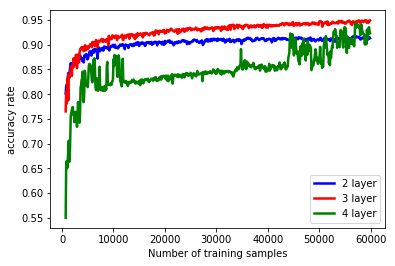

In [21]:
from pylab import *
%matplotlib inline
t = np.arange(700,60000, 100)
plot(t, accuracy_need2[7:], color="blue", linewidth=2.5, linestyle="-", label="2 layer")
plot(t, accuracy_need[7:], color="red",  linewidth=2.5, linestyle="-", label="3 layer")
plot(t, accuracy_need4[7:], color="green",  linewidth=2.5, linestyle="-", label="4 layer")
legend(loc='lower right')
plt.xlabel('Number of training samples')
plt.ylabel('accuracy rate')

#### 三层网络时间

In [23]:
inputSize  = 784
outputSize = 10
hiddenSize = 89
batchSize  = 1
trainCycle = 60000
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)
# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练

start =time.clock()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
    end =time.clock()
    print("训练60000轮总用时", end-start,"s")
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images, outputLabel: mnist.test.labels})
    print("最终 accuracy on test set:", accuracyValue)
    sess.close()

训练60000轮总用时 46.688996714275504 s
最终 accuracy on test set: 0.9389


####  自己实现

In [53]:
import math
import numpy as np
import random
random.seed(0)
def tanh(x):
    return (np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))
def dtanh(y):
    return 1.0 - y*y

class NN:
    def __init__(self, ni, nh_li, no):
        # 输入层、隐藏层列表、输出层
        self.ni = ni 
        self.nh_li = nh_li
        self.nh_len = len(nh_li)
        self.no = no
        self.w = []#输入层到第一层隐含层，。。。，最后一层隐含层到输出层 总长度为 nh_len+1
        
        self.w.append(np.random.normal(0.0, pow(self.nh_li[0],-0.5), (self.nh_li[0],self.ni)))
        for i in range(self.nh_len-1):
            self.w.append(np.random.normal(0.0, pow(self.nh_li[i+1],-0.5), (self.nh_li[i+1],self.nh_li[i])))
        self.w.append(np.random.normal(0.0, pow(self.no,-0.5), (self.no,self.nh_li[self.nh_len-1])))
        
    def oneRound(self, inputs,targets,N):
        targets = np.array(targets,ndmin=2).T
        # 激活输入层
        inputs = np.array(inputs,ndmin=2).T/255
        # 隐含层输出

        outputs = []# 输入层到第一个隐含层，。。。，最后一个隐含层到输出层  总长度为 nh_len+1
        outputs.append(tanh(np.dot(self.w[0],inputs)))
        for i in range(self.nh_len-1):
            outputs.append(tanh(np.dot(self.w[i+1],outputs[i])))
        # 输出层输出
        outputs.append(tanh(np.dot(self.w[self.nh_len], outputs[self.nh_len-1])))
        
        
        deltas = []#输出层，最后一个隐含层 。。。 第一个隐含层  总长度为 nh_len+1
        #计算输出层的误差
        output_deltas = dtanh(outputs[self.nh_len])*(targets - outputs[self.nh_len])
        deltas.append(output_deltas)
        for i in range(self.nh_len):
            deltas.append(dtanh(outputs[self.nh_len-1-i])* np.dot(self.w[self.nh_len-i].T, deltas[i]))

            
        for i in range(self.nh_len):
            self.w[self.nh_len-i] += N*np.dot(deltas[i], np.transpose(outputs[self.nh_len-i-1]))
        self.w[0] += N*np.dot(deltas[self.nh_len], np.transpose(inputs))
   
        return outputs[self.nh_len]
  
    def test(self, inputs_list,Y):
        le = len(Y)
        ans = 0
        for i in range(le):
            inputs = np.array(inputs_list[i],ndmin=2).T/255
            outputs = []# 输入层到第一个隐含层，。。。，最后一个隐含层到输出层  总长度为 nh_len+1
            outputs.append(tanh(np.dot(self.w[0],inputs)))
            for j in range(self.nh_len-1):
                outputs.append(tanh(np.dot(self.w[j+1],outputs[j])))
            # 输出层输出
            outputs.append(tanh(np.dot(self.w[self.nh_len], outputs[self.nh_len-1])))
            if np.argmax(outputs[self.nh_len])==Y[i]:
                ans+=1
        print('准确率',ans/le)
        return ans/le    

    def weights(self):
        return self.w

    def train(self, X, Y,iterations=100, N=0.01):
        len_total = len(Y)
        for i in range(iterations):
            for p in range(len_total):              
                inputs = X[p]
                target = Y[p]
                targets = trans(target)
                self.oneRound(inputs,targets,N)  
            print("第",i,"轮")
            self.test(X_test,Y_test)
            
def trans(li):
    re_list =[0.0]*10
    re_list[li]=1
    return re_list

In [54]:
num=60000
n = NN(784, [89], 10)
accuracy_rate_2 = n.train(X_train[:num],Y_train[:num],iterations=10)
n.test(X_test,Y_test)

第 0 轮
准确率 0.9132
第 1 轮
准确率 0.9253
第 2 轮
准确率 0.9314
第 3 轮
准确率 0.9348
第 4 轮
准确率 0.9374
第 5 轮
准确率 0.9392
第 6 轮
准确率 0.9412
第 7 轮
准确率 0.9424
第 8 轮
准确率 0.9435
第 9 轮
准确率 0.9448
准确率 0.9448


0.9448

In [66]:
import math
import numpy as np
import random
random.seed(0)
def tanh(x):
    return (np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))
def dtanh(y):
    return 1.0 - y*y

class NN:
    def __init__(self, ni, nh_li, no):
        # 输入层、隐藏层列表、输出层
        self.ni = ni 
        self.nh_li = nh_li
        self.nh_len = len(nh_li)
        self.no = no
        self.w = []#输入层到第一层隐含层，。。。，最后一层隐含层到输出层 总长度为 nh_len+1
        
        self.w.append(np.random.normal(0.0, pow(self.nh_li[0],-0.5), (self.nh_li[0],self.ni)))
        for i in range(self.nh_len-1):
            self.w.append(np.random.normal(0.0, pow(self.nh_li[i+1],-0.5), (self.nh_li[i+1],self.nh_li[i])))
        self.w.append(np.random.normal(0.0, pow(self.no,-0.5), (self.no,self.nh_li[self.nh_len-1])))
        
    def oneRound(self, inputs,targets,N):
        targets = np.array(targets,ndmin=2).T
        # 激活输入层
        inputs = np.array(inputs,ndmin=2).T/255
        # 隐含层输出

        outputs = []# 输入层到第一个隐含层，。。。，最后一个隐含层到输出层  总长度为 nh_len+1
        outputs.append(tanh(np.dot(self.w[0],inputs)))
        for i in range(self.nh_len-1):
            outputs.append(tanh(np.dot(self.w[i+1],outputs[i])))
        # 输出层输出
        outputs.append(tanh(np.dot(self.w[self.nh_len], outputs[self.nh_len-1])))
        
        
        deltas = []#输出层，最后一个隐含层 。。。 第一个隐含层  总长度为 nh_len+1
        #计算输出层的误差
        output_deltas = dtanh(outputs[self.nh_len])*(targets - outputs[self.nh_len])
        deltas.append(output_deltas)
        for i in range(self.nh_len):
            deltas.append(dtanh(outputs[self.nh_len-1-i])* np.dot(self.w[self.nh_len-i].T, deltas[i]))

            
        for i in range(self.nh_len):
            self.w[self.nh_len-i] += N*np.dot(deltas[i], np.transpose(outputs[self.nh_len-i-1]))
        self.w[0] += N*np.dot(deltas[self.nh_len], np.transpose(inputs))
   
        return outputs[self.nh_len]
  
    def test(self, inputs_list,Y):
        le = len(Y)
        ans = 0
        for i in range(le):
            inputs = np.array(inputs_list[i],ndmin=2).T/255
            outputs = []# 输入层到第一个隐含层，。。。，最后一个隐含层到输出层  总长度为 nh_len+1
            outputs.append(tanh(np.dot(self.w[0],inputs)))
            for j in range(self.nh_len-1):
                outputs.append(tanh(np.dot(self.w[j+1],outputs[j])))
            # 输出层输出
            outputs.append(tanh(np.dot(self.w[self.nh_len], outputs[self.nh_len-1])))
            if np.argmax(outputs[self.nh_len])==Y[i]:
                ans+=1
#         print('准确率',ans/le)
        return ans/le    

    def weights(self):
        return self.w

    def train(self, X, Y,iterations=100, N=0.01):
        need = []
        len_total = len(Y)
        for i in range(iterations):
            for p in range(len_total):              
                inputs = X[p]
                target = Y[p]
                targets = trans(target)
                self.oneRound(inputs,targets,N)  
                if p%(100)==0 and p!=0:
                    need.append(self.test(X_test,Y_test))
        return need
            
def trans(li):
    re_list =[0.0]*10
    re_list[li]=1
    return re_list

In [67]:
num=60000
n = NN(784, [89], 10)
accuracy_rate = n.train(X_train[:num],Y_train[:num],iterations=1)
print(n.test(X_test,Y_test))

0.9052


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
acc_rate = []
t_time = []
for i in range(10):
    start =time.clock()
    kNN_classifier_3 = KNeighborsClassifier(n_neighbors=i+1)
    kNN_classifier_3.fit(X_train, Y_train)
    end1 =time.clock()
    t_time.append(end1-start)
#     print("当k=",i+1,"时，训练所用时间",end1-start,"s")
    y_predict_3 = kNN_classifier_3.predict(X_test[:1000])
    end2 =time.clock()
    acc_rate.append(sum(y_predict_3 == Y_test[:1000])/len(Y_test[:1000]))
    

In [47]:
kNN_classifier_2 = KNeighborsClassifier(n_neighbors=20)
kNN_classifier_2.fit(X_train, Y_train)
y_predict_2 = kNN_classifier_2.predict(X_test[:1000])
sum(y_predict_2 == Y_test[:1000])/len(Y_test[:1000])

0.946

In [19]:
kNN_classifier_2 = KNeighborsClassifier(n_neighbors=2)
kNN_classifier_2.fit(X_train, Y_train)
y_predict_2 = kNN_classifier_2.predict(X_test[:1000])
sum(y_predict_2 == Y_test[:1000])/len(Y_test[:1000])#0.9627#10000  0.9705

0.948

#### 作图

Text(0,0.5,'accuracy rate')

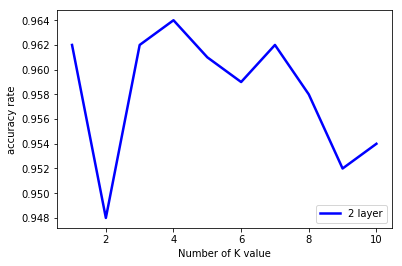

In [46]:
from pylab import *
%matplotlib inline
t = np.arange(1,11, 1)
plot(t, acc_rate, color="blue", linewidth=2.5, linestyle="-", label="2 layer")
# plot(t, accuracy_need[7:], color="red",  linewidth=2.5, linestyle="-", label="3 layer")
# plot(t, accuracy_need4[7:], color="green",  linewidth=2.5, linestyle="-", label="4 layer")
legend(loc='lower right')
plt.xlabel('Number of K value')
plt.ylabel('accuracy rate')

#### 综合比较

In [65]:
n =500


prob  = svm_problem(y_train_svm[:n], x_train_svm[:n])
param = svm_parameter('-t 1 -c 4 -m 1024')
model = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test_svm[:1000], x_test_svm[:1000], model)


inputSize  = 784
outputSize = 10
hiddenSize = 89
batchSize  = 1
trainCycle = n
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)
# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练

accuracy_need=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images[:1000], outputLabel: mnist.test.labels[:1000]})
    print("最终 accuracy on test set:", accuracyValue)
    accuracy_need.append(accuracyValue)
    sess.close()
    
    

kNN_classifier_2 = KNeighborsClassifier(n_neighbors=4)
kNN_classifier_2.fit(X_train[:n], Y_train[:n])
y_predict_2 = kNN_classifier_2.predict(X_test[:1000])
n =500print(sum(y_predict_2 == Y_test[:1000])/len(Y_test[:1000]))

Accuracy = 78.2% (782/1000) (classification)
最终 accuracy on test set: 0.702
0.754


In [73]:

n =20000


inputSize  = 784
outputSize = 10
hiddenSize = 89
batchSize  = 1
trainCycle = 10*n
# 输入层
inputLayer = tf.placeholder(tf.float32, shape=[None, inputSize])
# 隐藏层
hiddenWeight = tf.Variable(tf.truncated_normal([inputSize, hiddenSize], mean=0, stddev=0.1))
hiddenBias   = tf.Variable(tf.truncated_normal([hiddenSize]))
hiddenLayer  = tf.add(tf.matmul(inputLayer, hiddenWeight), hiddenBias)
hiddenLayer  = tf.nn.sigmoid(hiddenLayer)
# 输出层
outputWeight = tf.Variable(tf.truncated_normal([hiddenSize, outputSize], mean=0, stddev=0.1))
outputBias   = tf.Variable(tf.truncated_normal([outputSize], mean=0, stddev=0.1))
outputLayer  = tf.add(tf.matmul(hiddenLayer, outputWeight), outputBias)
outputLayer  = tf.nn.sigmoid(outputLayer)
# 标签
outputLabel = tf.placeholder(tf.float32, shape=[None, outputSize])
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=outputLabel, logits=outputLayer))
# 优化器
optimizer = tf.train.AdamOptimizer()
# 训练目标
target = optimizer.minimize(loss)
# 训练

accuracy_need=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(trainCycle):
        batch = mnist.train.next_batch(batchSize)
        sess.run(target, feed_dict={inputLayer: batch[0], outputLabel: batch[1]})
    # 测试
    corrected = tf.equal(tf.argmax(outputLabel, 1), tf.argmax(outputLayer, 1))
    accuracy  = tf.reduce_mean(tf.cast(corrected, tf.float32))
    accuracyValue = sess.run(accuracy, feed_dict={inputLayer: mnist.test.images[:1000], outputLabel: mnist.test.labels[:1000]})
    print("最终 accuracy on test set:", accuracyValue)
    accuracy_need.append(accuracyValue)
    sess.close()

最终 accuracy on test set: 0.964
